# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv is in the same folder as this notebook




### Dataindlæsning

Vi starter med at importere nødvendige Python-biblioteker og indlæser Airbnb-data fra København.
Dette giver os mulighed for at analysere, forberede og modellere data i de næste trin.

### Håndtering af manglende data

I denne celle fjerner vi alle rækker med manglende værdier (`NaN`).

**Hvorfor gør vi det?**
- Det sikrer, at vi ikke får fejl i efterfølgende analyser og modeller.
- Det er en hurtig måde at rydde datasættet op på.

**Men vi kunne også have valgt at:**
- Imputere værdier (med fx gennemsnit, median, eller mode)
- Bruge maskinlæring (fx kNN) til at udfylde hullerne
- Behandle `NaN` som en særlig kategori (ved kategoriske data)

Det vigtige er, at man er bevidst om valget og konsekvenserne.


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


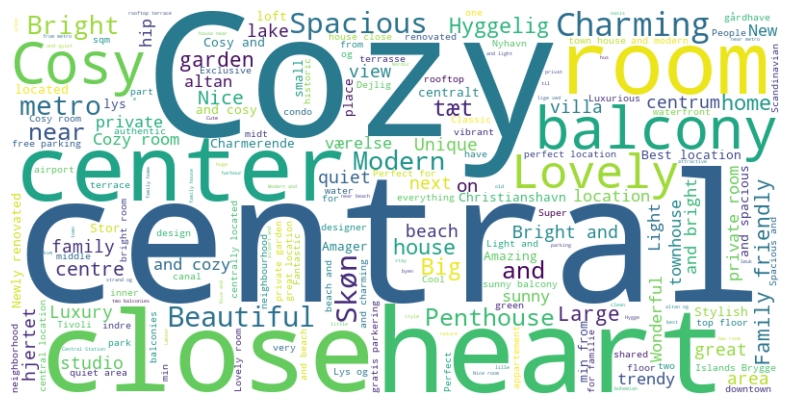

In [1]:
import pandas as pd
import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan
data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

### ☁️ WordCloud over værtsnavne

Her laves en WordCloud over `host_name`-kolonnen, som visualiserer hyppigheden af værtsnavne.

> Vi bliver bedt om at sammenligne dette med navnefordelingen i Danmarks Statistik.

**Hvordan vurderer man det?**
- Hyppige navne som *Peter*, *Morten*, *Anne* kan indikere en vis lighed med befolkningen.
- Anderledes navne eller meget gentagne navne kan pege på bias eller særlige forhold i data.


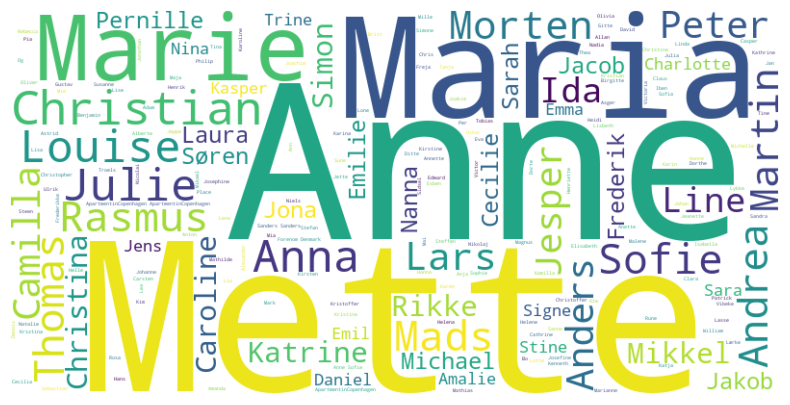

In [2]:
# Solution below

# Converting the host names to a simple string
host_names = ' '.join(data_filtered['host_name'].astype(str))

# creating and generating the word cloud with host names
hostname_wordcloud = WordCloud(background_color="white", width=800, height=400).generate(host_names)

# displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(hostname_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Sammenligning af WordCloud med Danmarks Statistik – Navnefordeling
- Flere af de mest almindelige pigenavne i Danmark optræder i WordCloud’en
→ Fx Mette, Anne, Maria, Charlotte, Ida, Louise

- Også mange af de mest almindelige drengenavne går igen
→ Fx Peter, Michael, Lars, Thomas, Mikkel, Anders, Mads, Rasmus

- Dette underbygger antagelsen om, at værtsnavnene i datasættet er repræsentative
→ Navnefordelingen blandt værterne på Airbnb i København ligner navnefordelingen i den danske befolkning generelt

- Sammenligningen giver mening, fordi vi undersøger, om der er skævheder eller bias i data
→ Fx om visse grupper er over- eller underrepræsenterede

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

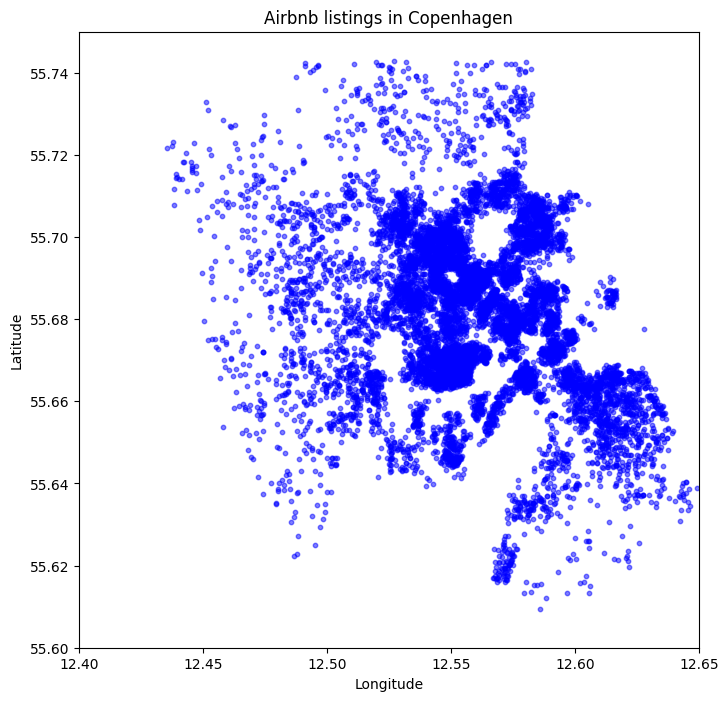

In [3]:
plt.figure(figsize=(8, 8))

# creating a scatter-plot with longitude and latitude, using alpha to show where there multiple listings in a tight spot
plt.scatter(data_filtered['longitude'], data_filtered['latitude'], alpha=0.5, c='blue', s=10)

# displaying the scatter plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb listings in Copenhagen')

# setting limits for the copenhagen area
plt.xlim(12.4, 12.65)
plt.ylim(55.6, 55.75)

plt.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

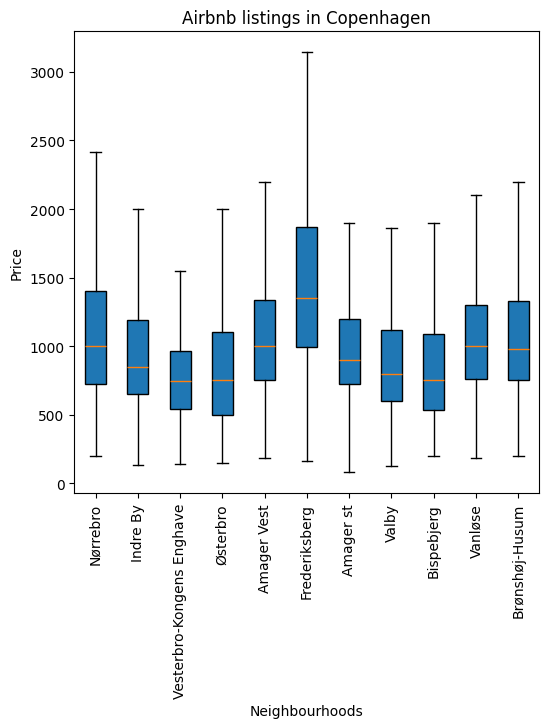

In [4]:
# Vi laver et boxplot som viser fordelingen af priser
# Et boxplot viser median (midterlinjen), kvartiler (boksen), og outliers (prikker udenfor)
# Det er godt til at vurdere om data er skævt fordelt eller har ekstreme værdier
plt.figure(figsize=(6, 6))

# grouping data by 'neighbourhoods' and prices as lists
grouped_prices = [group["price"].values for name, group in data_filtered.groupby("neighbourhood_cleansed")]

# creating label for all neighbourhoods
labels = data_filtered["neighbourhood_cleansed"].unique()

# creating a box plot with neighbourhood and price, using alpha to show where there multiple listings in a tight spot
plt.boxplot(grouped_prices, tick_labels=labels, patch_artist=True, showfliers=False)

# displaying the plot
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.title('Airbnb listings in Copenhagen')
plt.xticks(rotation=90)
plt.show()

### Fortolkning af boxplot: Prisfordeling pr. bydel
- Boxplottet viser variationen i **Airbnb-priser på tværs af bydele i København**
- Hver boks viser:
  - Medianpris (den vandrette streg i midten)
  - Nedre og øvre kvartil (25% og 75%)
  - "Whiskers" viser prisintervallet uden outliers
  - Punkter udenfor whiskers (hvis vist) er outliers

#### Observationer:
- **Frederiksberg og Amager Vest** har de højeste medianpriser
- **Enghave, Østerbro og Bispebjerg** har generelt lavere priser
- Nogle bydele som **Frederiksberg og Nørrebro** har stor spredning i prisniveau
- Den store prisvariation kan indikere forskellige boligtyper eller forskel på efterspørgsel

#### Viden:
- Boxplots er nyttige til at identificere outliers og vurdere spredning
- Hvis boksen er "skæv" eller whiskers er ulige, kan det indikere en skæv fordeling

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

### Deskriptiv analyse af bydele (review_scores_rating + room_type)

Vi analyserer, hvordan **gæsternes bedømmelser (review_scores_rating)** varierer mellem Københavns bydele.
Samtidig inkluderer vi **den mest almindelige værelsestype (room_type)** og beregner centrale statistiske mål.

#### Centrale målepunkter inkluderet:
- **mean** (gennemsnit)
- **std / var** (standardafvigelse og varians)
- **median**
- **minimum og maksimum**
- **quartiles** (25%, 50%, 75%)
- **mode** for værelsestype

Det giver os et samlet billede af **kvaliteten og variationen af udlejninger i hver bydel**.


In [5]:
# Jeg har valgt at analysere nabolag og vurderinger fra gæster (review_scores_rating),
# for at undersøge hvordan kvaliteten af udlejninger varierer mellem områder i København

# Vi grupperer data per bydel
grouped_neighborhoods = data_filtered.groupby("neighbourhood_cleansed")

# Udregner gennemsnit, standardafvigelse, median, varians, minimum, maksimum og antal observationer
rating_stats = grouped_neighborhoods["review_scores_rating"].agg(["mean", "std", "median", "var", "min", "max", "count"]).reset_index()

# Beregner kvartiler (25%, 50%, 75%) separat og tilføjer dem
rating_quartiles = grouped_neighborhoods["review_scores_rating"].quantile([0.25, 0.5, 0.75]).unstack()
rating_stats["25%"] = rating_quartiles[0.25].values
rating_stats["50%"] = rating_quartiles[0.5].values
rating_stats["75%"] = rating_quartiles[0.75].values

# Finder den mest almindelige værelsestype per bydel (mode)
mode_room_type = grouped_neighborhoods["room_type"].agg(lambda x: x.mode().iloc[0])
rating_stats["most_common_room_type"] = mode_room_type.values

# Viser det samlede resultat i én tabel
display(rating_stats)

,neighbourhood_cleansed,mean,std,median,var,min,max,count,25%,50%,75%,most_common_room_type
0,Amager Vest,4.815080,0.308644,4.90,0.095261,1.0,5.0,1059,4.7500,4.90,5.0,Entire home/apt
1,Amager st,4.798214,0.279165,4.87,0.077933,1.0,5.0,924,4.7000,4.87,5.0,Entire home/apt
2,Bispebjerg,4.796424,0.281760,4.89,0.079389,3.0,5.0,604,4.7000,4.89,5.0,Entire home/apt
3,Brønshøj-Husum,4.777789,0.292324,4.87,0.085453,3.0,5.0,285,4.6700,4.87,5.0,Entire home/apt
4,Frederiksberg,4.829167,0.283049,4.93,0.080117,0.0,5.0,1177,4.7500,4.93,5.0,Entire home/apt
5,Indre By,4.771903,0.290467,4.86,0.084371,2.0,5.0,1844,4.6700,4.86,5.0,Entire home/apt
6,Nørrebro,4.806155,0.262467,4.88,0.068889,2.5,5.0,2057,4.7100,4.88,5.0,Entire home/apt
7,Valby,4.766994,0.360935,4.88,0.130274,1.0,5.0,539,4.6700,4.88,5.0,Entire home/apt
8,Vanløse,4.773960,0.288201,4.83,0.083060,3.0,5.0,298,4.6725,4.83,5.0,Entire home/apt
9,Vesterbro-Kongens Enghave,4.828225,0.248275,4.91,0.061641,3.0,5.0,2034,4.7500,4.91,5.0,Entire home/apt


### Fortolkning og pointer:

- **Gennemsnit og median**: Alle bydele har høje gennemsnitskarakterer (typisk over 4.75), hvilket indikerer generelt god kvalitet.
- **Standardafvigelse og varians**: Fx Valby har høj varians, hvilket kan betyde svingende kvalitet.
- **Frederiksberg og Vesterbro** har både høj gennemsnitskarakter og lav varians → stabil og høj kvalitet.
- **Minimumsværdier** tæt på 0 kan pege på enkelte meget dårlige anmeldelser.
- **Room_type** viser, at hele lejligheder er mest almindelige i alle bydele → dette kan forklare den generelt høje tilfredshed.

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

### k-Nearest Neighbor model – Priskategorisering

Vi udvikler en k-Nearest Neighbor (kNN) model til at forudsige, om en Airbnb-udlejning tilhører pris-kategori **0** (lav) eller **1** (høj), baseret på:

- `room_type` (værelsestype – kategorisk)
- `number_of_reviews` (antal anmeldelser)
- `review_scores_rating` (bedømmelse fra gæster)

Vi deler datasættet op i **80% træning og 20% test**, træner modellen med `k=7`, og evaluerer derefter resultaterne med **accuracy, precision, recall og f1-score**.


In [6]:
# Vi vælger relevante features, som kan have betydning for prisen
selected_features = data_filtered[["room_type", "number_of_reviews", "review_scores_rating", "price_category"]]

# Konverterer room_type til numerisk med one-hot encoding (drop_first for at undgå dummy trap)
selected_features = pd.get_dummies(selected_features, columns=["room_type"], drop_first=True)

# Fjerner rækker med manglende værdier
selected_features = selected_features.dropna()

# Splitter data i input (X) og target (y)
X = selected_features.drop("price_category", axis=1)
y = selected_features["price_category"]

# Splitter data i trænings- og testdata (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træner kNN-model med k=7 (kan evt. optimeres)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Forudsiger på testdata
y_pred = knn.predict(X_test)

# Evaluerer modellen med accuracy og klassifikationsrapport
print("Accuracy:", knn.score(X_test, y_test))
print("\n Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.5655399835119538

 Classification Report
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1176
           1       0.58      0.60      0.59      1250

    accuracy                           0.57      2426
   macro avg       0.56      0.56      0.56      2426
weighted avg       0.57      0.57      0.57      2426



### Fortolkning af modelresultater

- **Accuracy:** ~0.56 → modellen klassificerer korrekt i 56% af tilfældene
  → Dette er kun lidt bedre end tilfældig gætning ved to klasser

#### Precision og recall:
- **Klasse 0 (lav pris):**
  - Precision: 0.55 → 55% af dem vi forudsiger som “lav pris” er faktisk korrekte
  - Recall: 0.53 → modellen finder 53% af de faktiske “lav pris”-tilfælde

- **Klasse 1 (høj pris):**
  - Precision: 0.58 → lidt bedre end lav pris
  - Recall: 0.60 → modellen fanger 60% af de høje priser

#### F1-score:
- Ligger omkring 0.56 samlet set → afbalanceret mål mellem precision og recall

### Konklusion:
- kNN-modellen har **begrænset præcision**, men giver en god start
- Der er rum for forbedring ved:
  - Skalering af data
  - Hyperparameter-tuning (fx finde bedste `k`)
  - Prøv med flere features eller brug andre modeller (fx logistisk regression)